<center><font size=10> Use Car Price Analysis </font></center>

### Objective

This project analyzes a dataset of 426,000 used cars to identify features impacting their prices. The goal is to develop predictive models for a used car dealership to optimize inventory, pricing strategies, and marketing efforts

# Data Dictionary


* ID: Unique identifier for each listing
* Region: Geographic region where the car is listed
* Price: The listing price of the car
* Year: Year of manufacture
* Manufacturer: Car manufacturer
* Model: Car model
* Condition: Condition of the car (e.g., new, like new, etc.)
* Cylinders: Number of cylinders in the engine
* Fuel: Type of fuel used (e.g., gas, diesel, etc.)
* Odometer: Odometer reading
* Title_status: Title status of the car (e.g., clean, salvage, etc.)
* Transmission: Type of transmission (e.g., automatic, manual)
* VIN: Vehicle Identification Number
* Drive: Type of drive (e.g., 4wd, fwd, RWD)
* Size: Size category of the car
* Type: Type/category of the car (e.g., sedan, SUV, truck)
* Paint_color: Color of the car's paint
* State: State where the car is listed





In [ ]:
#To load data set if using Google Collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Berkeley/Project 2/vehicles.csv'
vehicles_data = pd.read_csv(data_path)

In [ ]:
# Library to help with reading and manipulating data
import pandas as pd

In [ ]:
# To isplay the first few rows of the dataset
vehicles_data_head = vehicles_data.head()

# To display the summary information of the dataset including the data types and number of non-null values
vehicles_data_info = vehicles_data.info()

# To show basic statistical summaries of numeric columns
vehicles_data_description = vehicles_data.describe()

vehicles_data_head, vehicles_data_info, vehicles_data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

**Dataset Overview:**
*   The dataset has 426,880 entries and 18 columns
*   Columns include information about the car's region, price, year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission, VIN, drive type, size, car type, paint color, and the state it's registered in.

**Data Types and Missing Values:**
*   Most columns have non-null entries, but there are some missing data in several columns, such as condition, cylinders, drive, size, type, and paint_color.
*   The year and odometer columns (Which are important for analysis) have some missing values but are mostly complete.

**Statistical Summary:**
*   Price: The price column, the target variable, ranges from 0 to about 3.7 billion, which suggests some outliers or incorrect entries since a price of 3.7 billion for a used car is unrealistic. But data only using 426K.
*   Year: The year of the cars ranges from 1900 to 2022. This range might include some historic or antique vehicles. TBD
*   Odometer: The mileage of the cars varies from 0 to 10 million miles, with an average around 98,043 miles. The maximum value seems super high, this can be to outliers or errors.


### Data Preprocessing

In [ ]:
# 1. This is to remove unrealistic prices: I Assumed that cars priced at 0 are errors or not for sale
# and extremely high prices as outliers.

price_threshold = 100000  # This seems to be a reasonable upper limit for used car prices
vehicles_data_cleaned = vehicles_data[(vehicles_data['price'] > 100) & (vehicles_data['price'] < price_threshold)]

# 2. This I sused to Filter out unrealistic odometer readings, assuming a very high mileage might be an error.
odometer_threshold = 300000  # This seems to be a reasonable upper limit for mileage
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['odometer'] < odometer_threshold]

# 3. This is to Drop rows with missing 'year' as it's are the most important for analysis
vehicles_data_cleaned = vehicles_data_cleaned.dropna(subset=['year'])

# 4. To assigned missing values in 'manufacturer', 'model', 'fuel', 'transmission' with the mode (most common value)
for column in ['manufacturer', 'model', 'fuel', 'transmission']:
    most_common = vehicles_data_cleaned[column].mode()[0]
    vehicles_data_cleaned[column] = vehicles_data_cleaned[column].fillna(most_common)

# Finally, to check the cleaned data in a summary
cleaned_data_info = vehicles_data_cleaned.info()
cleaned_data_description = vehicles_data_cleaned.describe()

cleaned_data_info, cleaned_data_description


<class 'pandas.core.frame.DataFrame'>
Index: 383449 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            383449 non-null  int64  
 1   region        383449 non-null  object 
 2   price         383449 non-null  int64  
 3   year          383449 non-null  float64
 4   manufacturer  383449 non-null  object 
 5   model         383449 non-null  object 
 6   condition     237274 non-null  object 
 7   cylinders     227606 non-null  object 
 8   fuel          383449 non-null  object 
 9   odometer      383449 non-null  float64
 10  title_status  376239 non-null  object 
 11  transmission  383449 non-null  object 
 12  VIN           236830 non-null  object 
 13  drive         266832 non-null  object 
 14  size          107240 non-null  object 
 15  type          301299 non-null  object 
 16  paint_color   270370 non-null  object 
 17  state         383449 non-null  object 
dtypes: float

(None,
                  id          price           year       odometer
 count  3.834490e+05  383449.000000  383449.000000  383449.000000
 mean   7.311486e+09   18860.984885    2011.094104   91585.928105
 std    4.389369e+06   14377.477373       9.461509   61645.662169
 min    7.301583e+09     101.000000    1900.000000       0.000000
 25%    7.308103e+09    7499.000000    2008.000000   38048.000000
 50%    7.312620e+09   15500.000000    2013.000000   86912.000000
 75%    7.315252e+09   27777.000000    2017.000000  134617.000000
 max    7.317101e+09   99999.000000    2022.000000  299999.000000)

**Data Cleaning Summary**

* Price Filtering: rows with prices below 100 and above 100,000 dollars were removed. This will eliminate free/swap entries and outliers.

* Odometer Filtering: All entries with odometer readings above 300,000 miles were removed. This takes cares of errors or very high-mileage cars that are less likely to be relevant for typical used car buyers.

* Year Data: Any missing rows in the year information were dropped since the age of the car is importantn for pricing analysis.

* Atributed of Missing Values: Missing values such as manufacturer, model, fuel, and transmission were replaced with the most common value (mode) in each column.

**Cleaned Data Characteristics:**

* The cleaned dataset now contains 383,449 entries.

* All imporant fields (price, year, manufacturer, model, fuel, transmission) have complete data.

* The price ranges from 101 to 99,999 dollars, and the years range from 1900 to 2022.

* The odometer readings are more consistent, ranging from 0 to 299,999 miles.
Now you can do EDA and build any predictive models. For this project I'll use the following, but you can decied if you wnat to take a different approach:

In [ ]:
#   To display all features
print(vehicles_data.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [ ]:
# Library for manipulating and formatting temporal data.
import datetime

# Check if the 'year' column exists to calculate 'age'
if 'year' in vehicles_data.columns:
    current_year = datetime.datetime.now().year
    vehicles_data['age'] = current_year - vehicles_data['year']
else:
    print("The 'year' column is missing from the DataFrame.")

# I verify that the 'age' column was added. This gave me some trouble!!!
if 'age' not in vehicles_data.columns:
    print("Failed to add 'age' column. Check the 'year' column's existence and content.")
else:
    print("Successfully added 'age' column.")

# Assuming that 'age' and 'odometer' are your numeric columns of interest
numeric_cols = ['odometer', 'age']
categorical_cols = vehicles_data.select_dtypes(include=['object']).columns.tolist()

# This is to setup the preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# The you can apply the preprocessor to the DataFrame
try:
    vehicles_prepared = preprocessor.fit_transform(vehicles_data)
    print("Preprocessing successful.")
except Exception as e:
    print(f"An error occurred during preprocessing: {e}")


Successfully added 'age' column.
Preprocessing successful.


In [ ]:
# Checking the number of unique values per categorical column
unique_counts = {col: vehicles_data[col].nunique() for col in categorical_cols}
print(unique_counts)

{'region': 404, 'manufacturer': 42, 'model': 29649, 'condition': 6, 'cylinders': 8, 'fuel': 5, 'title_status': 6, 'transmission': 3, 'VIN': 118246, 'drive': 3, 'size': 4, 'type': 13, 'paint_color': 12, 'state': 51}


**Unique value Analysis**
Some of these features have many unique values, which could complicate your analysis and model training for example:

* High Cardinality: model: 29,649 unique values  
* VIN: 118,246 unique values.

**How to solve the issue?**

* Drop High Cardinality Columns: Features like VIN, which likely represent unique identifiers for each vehicle can be dropped since they don't provide a useful predictive power for generalized models.

* Reduce Categories in model: You can reduce the number of unique models by grouping less common models into an "other" category.

In [ ]:
# Check if 'year' column is present
if 'year' in vehicles_data.columns:
    current_year = datetime.datetime.now().year
    vehicles_data['age'] = current_year - vehicles_data['year']
else:
    print("The 'year' column is missing")

# Optionally, you might want to drop the 'year' column if it's no longer needed
# vehicles_data.drop('year', axis=1, inplace=True)

# Confirm 'age' has been added
print("Columns now include: ", vehicles_data.columns)


Columns now include:  Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'age'],
      dtype='object')


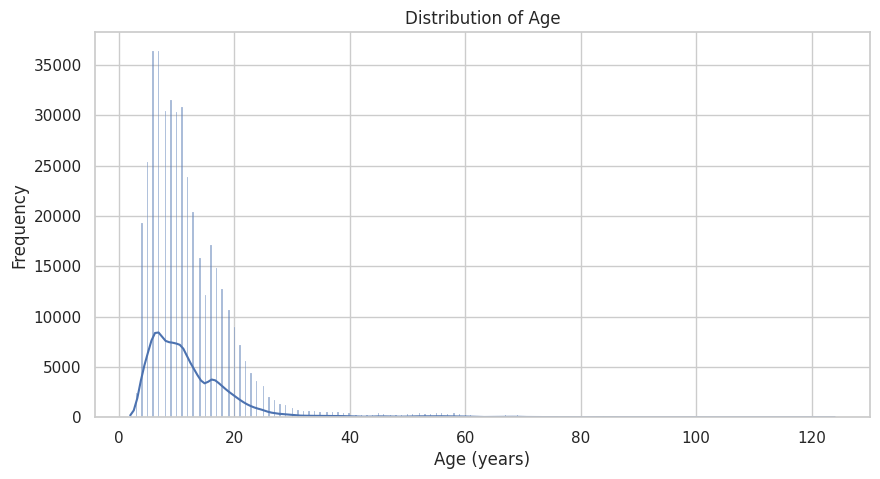

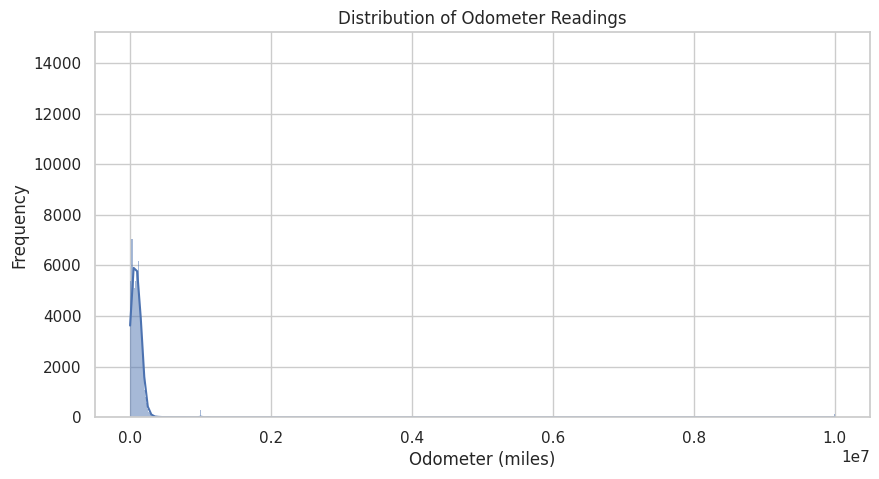

In [ ]:
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# I like this setting for seaborn bc it makes is look more aesthetic
sns.set(style="whitegrid")

# Histogram for 'age'
plt.figure(figsize=(10, 5))
sns.histplot(vehicles_data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'odometer'
plt.figure(figsize=(10, 5))
sns.histplot(vehicles_data['odometer'], kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()

### Histograms Explanation

**Distribution of Age**
The histogram for the age of vehicles shows a right-skewed distribution. This means many vehicles in this dataset are relatively new, with a peak frequency at younger ages. The frequency decreases for older vehicles, suggesting fewer ancient vehicles are in the dataset. The presence of cars at 0 indicates that many are nearly new. This distribution can imply that newer vehicles are more commonly available or preferred in the dataset you're analyzing.

**Distribution of Odometer**
The histogram for odometer readings shows a sharp peak near the lower end of the scale, which rapidly declines as mileage increases. This indicates that most vehicles in the dataset have low to moderate mileage, with few vehicles exhibiting high mileage. The rapid drop-off in frequency as mileage increases suggests that higher-mileage cars are less common, possibly due to lower desirability, reduced availability, or the nature of the dataset focusing more on newer or less-used vehicles.

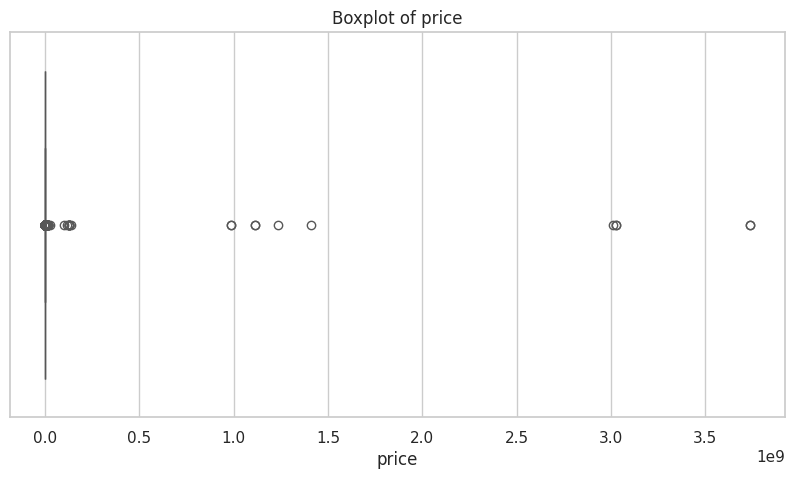

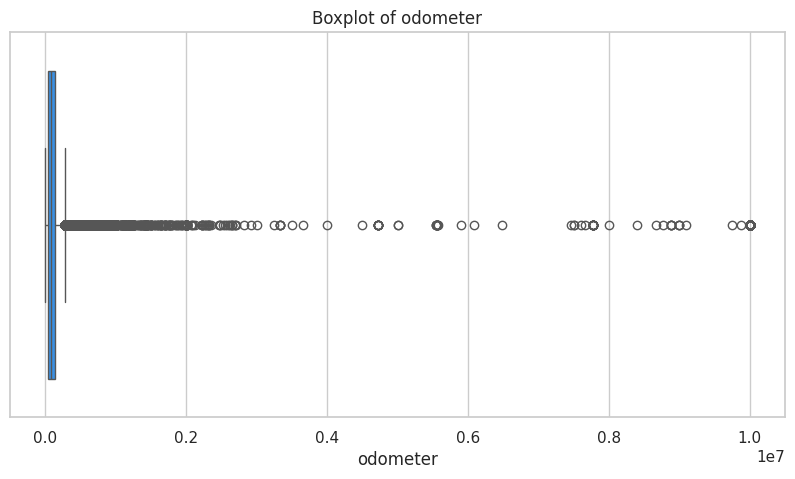

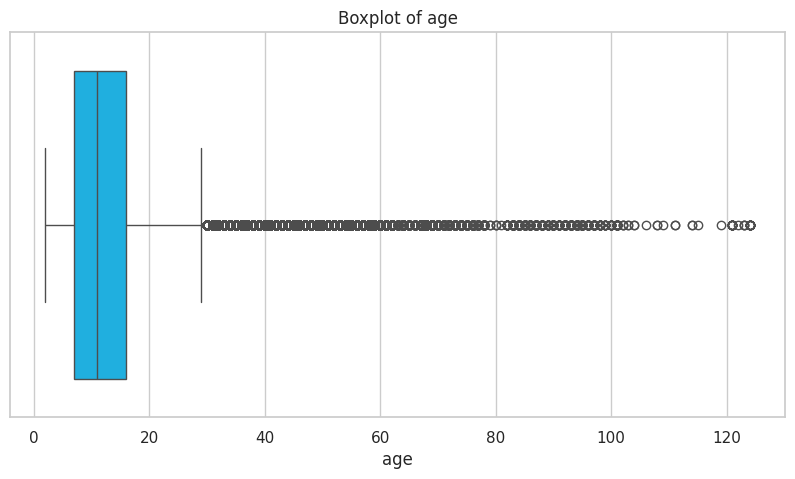

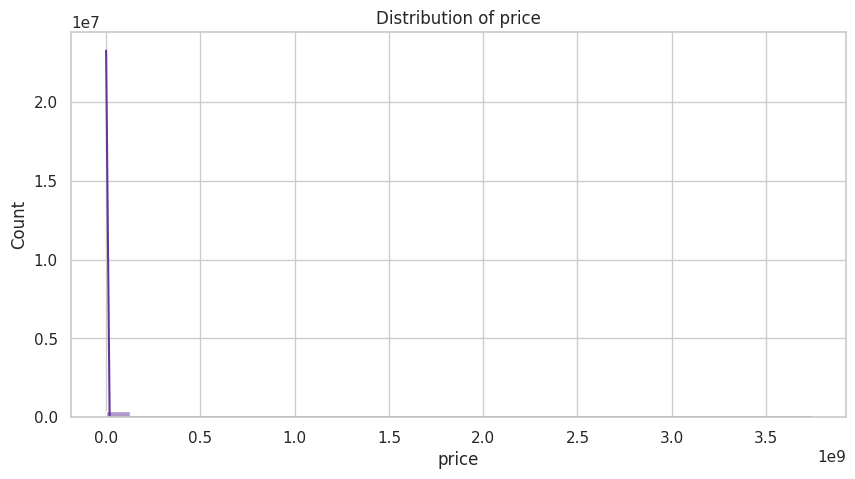

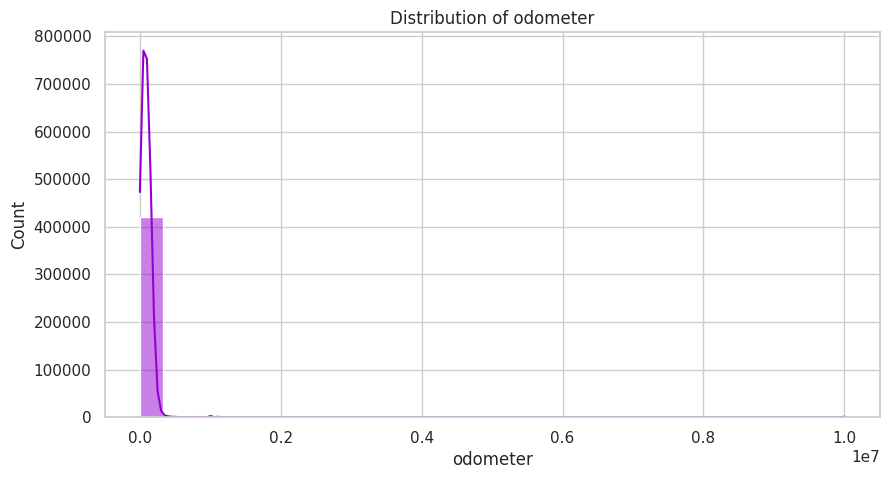

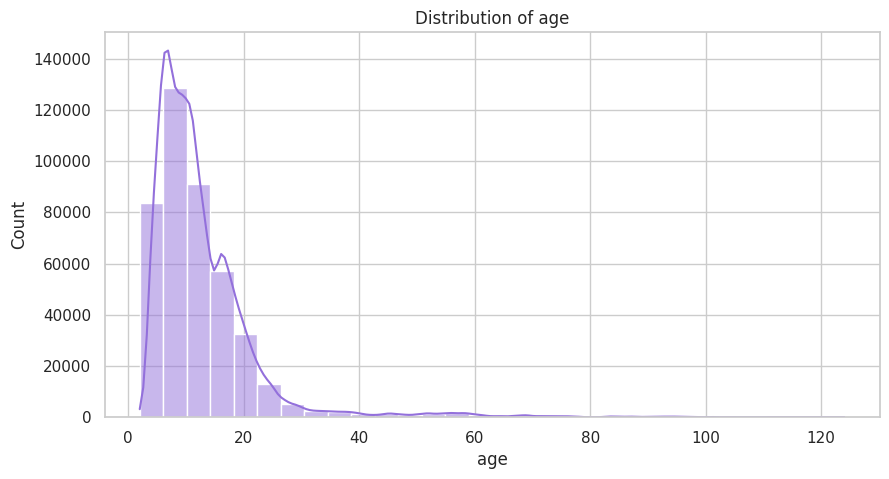

In [ ]:
#Histogram and boxplots for numerical values only
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables in your ds
numerical_vars = ['price', 'odometer', 'age']  # Age was added here for better distibution

# Classification by colors
boxplot_colors = ['royalblue', 'dodgerblue', 'deepskyblue']

# Plot box plots with different colors
for var, color in zip(numerical_vars, boxplot_colors):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=vehicles_data[var], color=color)
    plt.title(f'Boxplot of {var}')
    plt.show()

# Classification by colors
histogram_colors = ['rebeccapurple', 'darkviolet', 'mediumpurple']

# Plot histograms with different colors
for var, color in zip(numerical_vars, histogram_colors):
    plt.figure(figsize=(10, 5))
    sns.histplot(vehicles_data[var], kde=True, color=color, bins=30)
    plt.title(f'Distribution of {var}')
    plt.show()


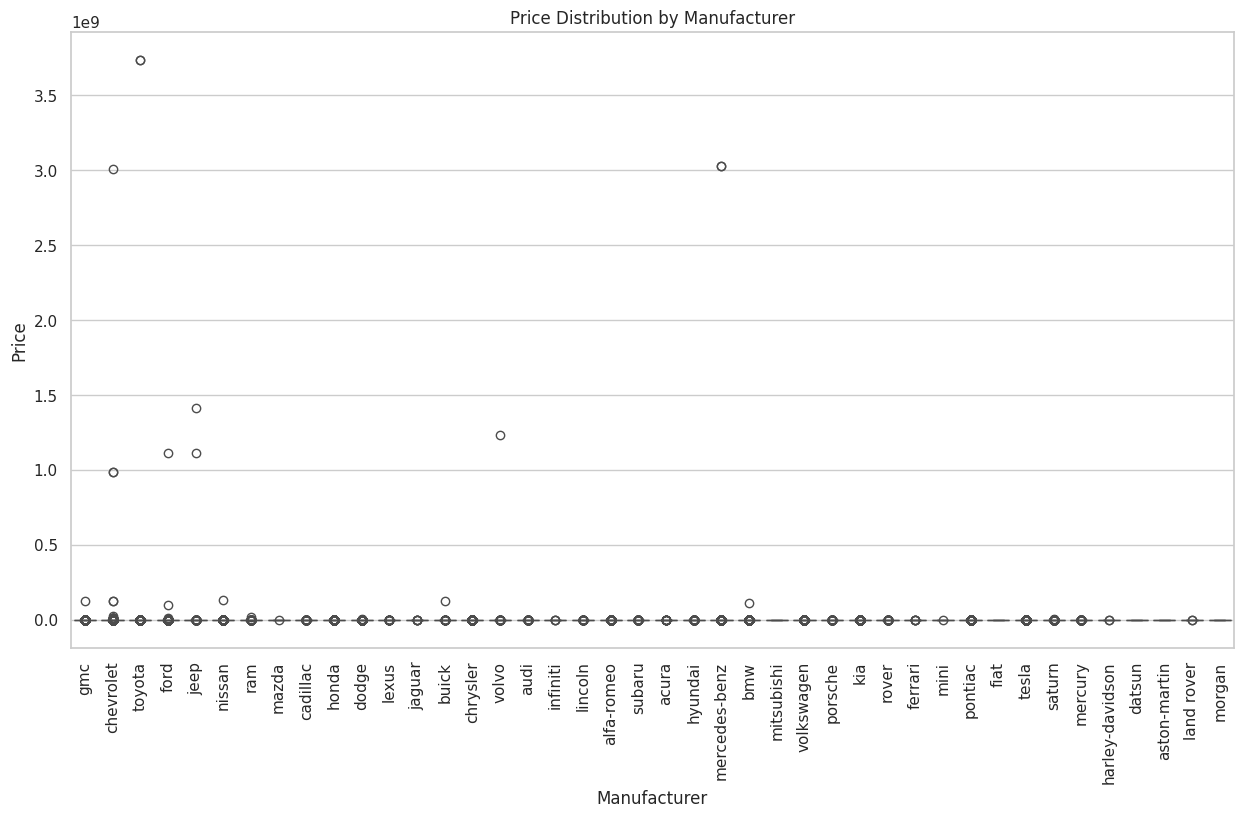

In [ ]:
# Boxplot for manufacturer against price
plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=vehicles_data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


**Boxplot of Price**
* The boxplot of the price reveals significant outliers, with a few extreme values far exceeding the general price range of most used cars. These outliers suggest the presence of high-end or incorrectly priced listings. The bulk of the data is concentrated at the lower end, indicating that most used cars are priced within a relatively affordable range.

**Boxplot of Odometer**
* The boxplot of the odometer readings shows a wide range of values with many outliers. The majority of the vehicles have lower odometer readings, suggesting they have not been driven extensively. The presence of outliers indicates that some cars have unusually high mileage, which could significantly impact their resale value.

**Boxplot of Age**
* The boxplot of the age of the vehicles shows that most cars are relatively young, with ages clustered between 0 and 20 years. There are a few outliers representing much older vehicles. This distribution highlights the tendency for newer vehicles to dominate the used car market, likely due to their better condition and higher demand.

**Distribution of Price**
* The histogram for the price distribution shows a highly skewed distribution with most cars priced at the lower end of the spectrum. This reinforces the observation from the boxplot that the majority of used cars are relatively affordable, with a long tail extending towards the higher prices.

**Distribution of Odometer**
* The histogram for the odometer readings illustrates a similar skewed distribution, with most vehicles having lower mileage. This pattern is consistent with the boxplot findings and indicates that lower-mileage cars are more prevalent in the used car market, which can be a significant factor in their pricing.

**Distribution of Age**
* The histogram for the distribution of age shows that most cars are relatively new, with a significant number of vehicles aged between 0 and 20 years. The distribution has a long tail extending towards older cars, but these are less common. This suggests a preference for newer models in the used car market.

**Price Distribution by Manufacturer**
* The boxplot of price distribution by manufacturer shows significant variability across different brands. Some manufacturers, like Tesla and Ferrari, have higher median prices, indicating their market position as premium brands. Other manufacturers, like Chevrolet and Ford, have lower median prices, reflecting their more affordable and widely available models.

<ipython-input-16-b5338036e83e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


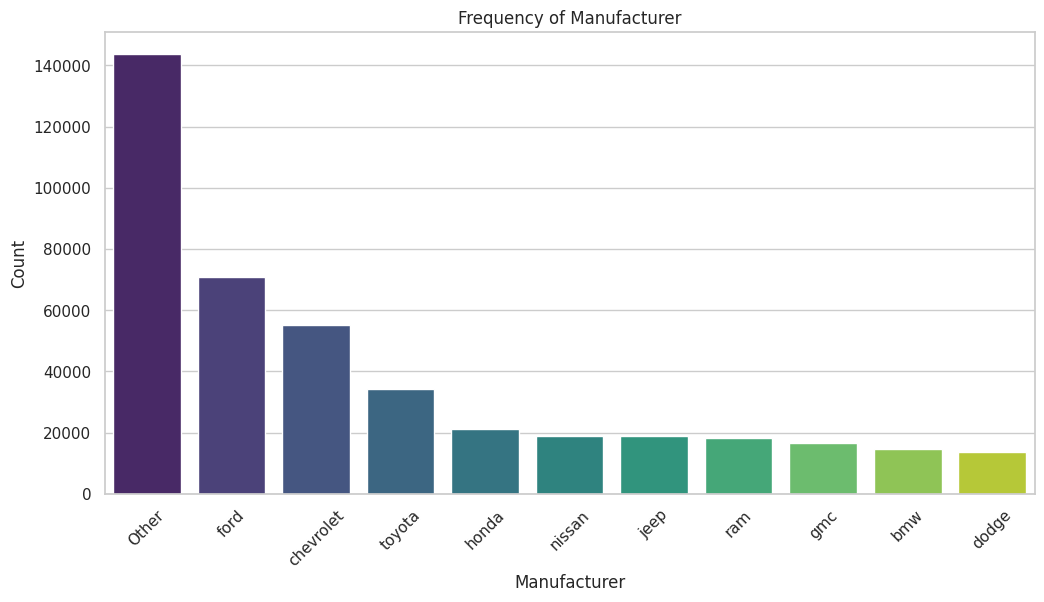

<ipython-input-16-b5338036e83e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


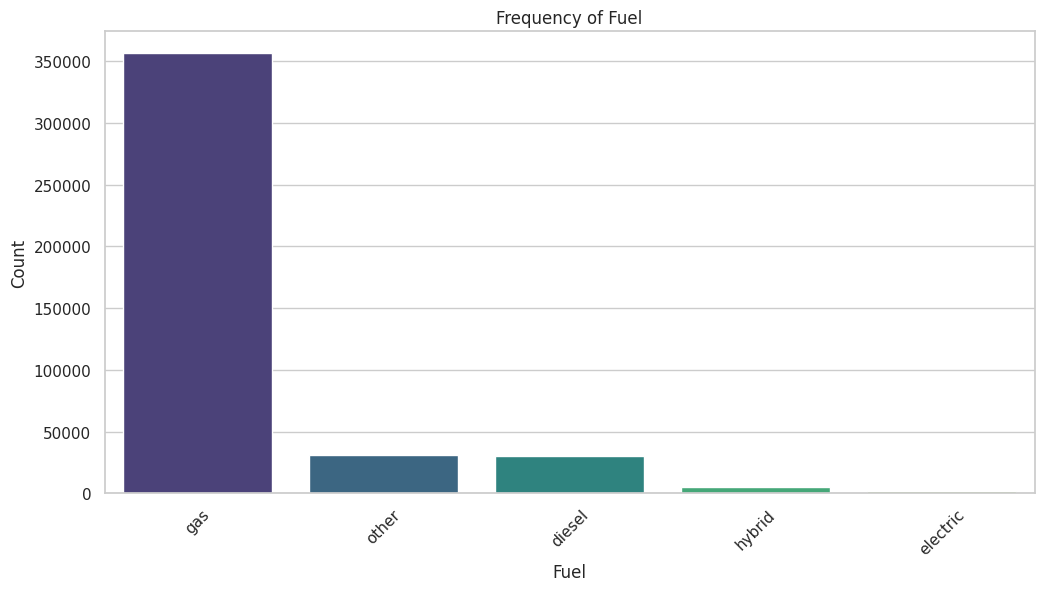

<ipython-input-16-b5338036e83e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


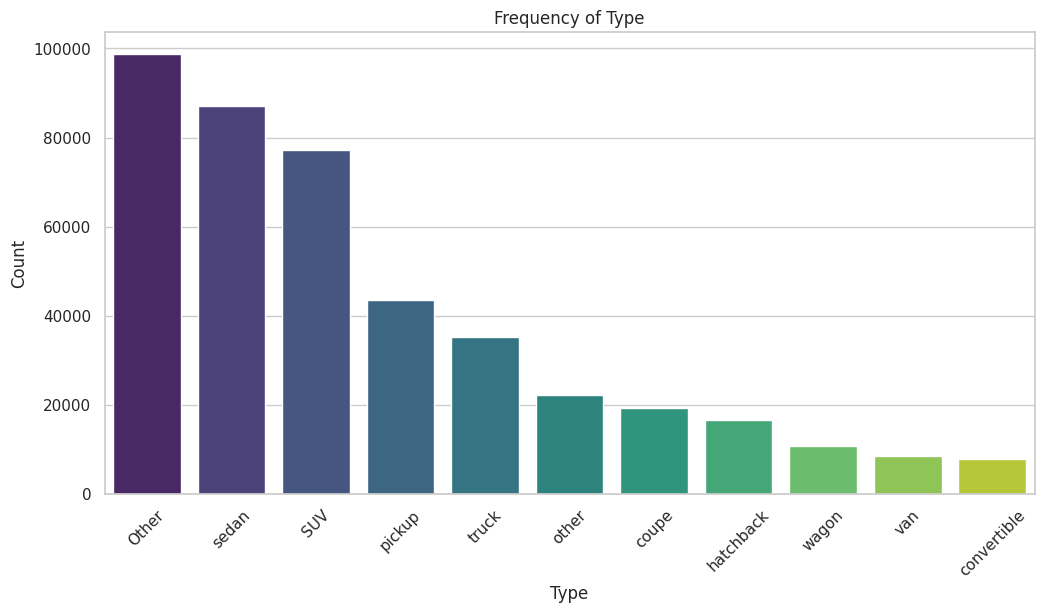

<ipython-input-16-b5338036e83e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


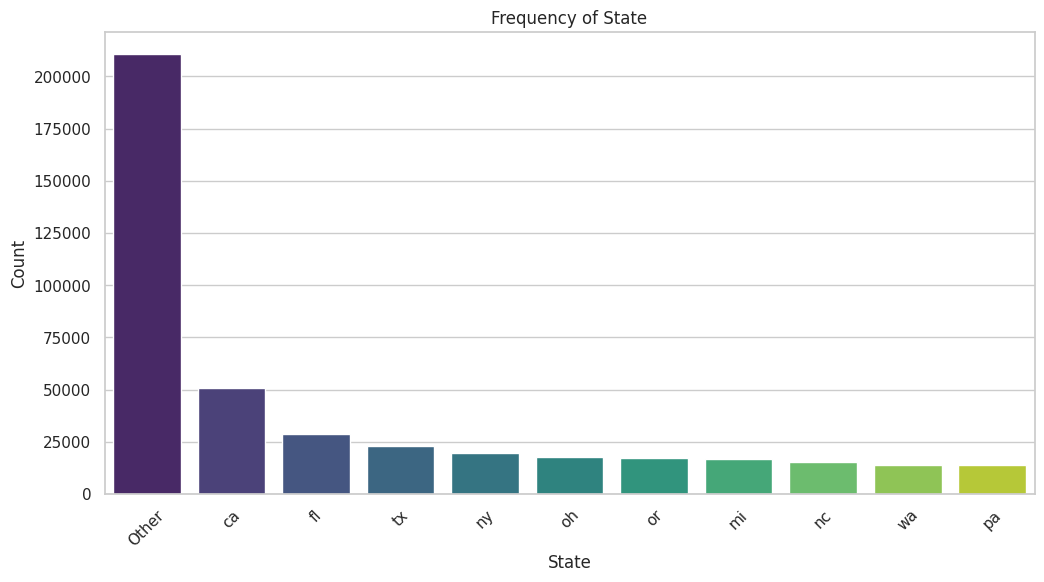

In [ ]:
# List of selected categorical variables
categorical_vars = ['manufacturer', 'fuel', 'type', 'state']  # You can add more if you want to

# to visualize each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(12, 6))

    # If the category has too many unique values, only display the top 10 and group the rest as 'Other' meddium dt
    if vehicles_data[var].nunique() > 10:
        # Get the top 10 categories
        top_categories = vehicles_data[var].value_counts().nlargest(10).index
        # Create a new column in DataFrame for the adjusted categories
        adjusted_column = vehicles_data[var].apply(lambda x: x if x in top_categories else 'Other')
        category_counts = adjusted_column.value_counts()
    else:
        category_counts = vehicles_data[var].value_counts()

    # Create the bar plot
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f'Frequency of {var.capitalize()}')
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    plt.xlabel(var.capitalize())  # Make sure x-label is properly capitalized
    plt.ylabel('Count')
    plt.show()


**Frequency of Manufacturer**
* The bar chart depicting the frequency of manufacturers shows that "other" manufacturers, which likely include a wide range of less common brands, dominate the dataset. Among the specific manufacturers, Ford, Chevrolet, Toyota, Honda, and Nissan are the most frequently listed, indicating their popularity and availability in the used car market.

**Frequency of Fuel**
* The frequency distribution of fuel types reveals that the vast majority of used cars in the dataset are gasoline-powered. Diesel, hybrid, and electric vehicles constitute a much smaller portion of the market, reflecting the current dominance of gasoline vehicles. This distribution suggests that while alternative fuel vehicles are available, they are not as prevalent as gasoline vehicles.

**Frequency of State**
* The bar chart for the frequency of listings by state shows that a significant portion of listings falls under the "other" category, which includes all less common states. Among the specific states, California (CA), Florida (FL), Texas (TX), New York (NY), and Ohio (OH) have the highest number of listings. This indicates that these states have robust used car markets, likely due to their larger populations and higher vehicle turnover rates.

**Frequency of Type**
* The frequency distribution of vehicle types shows that the "other" category is the most common, followed by sedans and SUVs. Pickup trucks and trucks are also well-represented in the dataset. This distribution highlights the diversity of vehicle types in the used car market, with a notable preference for sedans and SUVs, which are popular choices for many consumers.

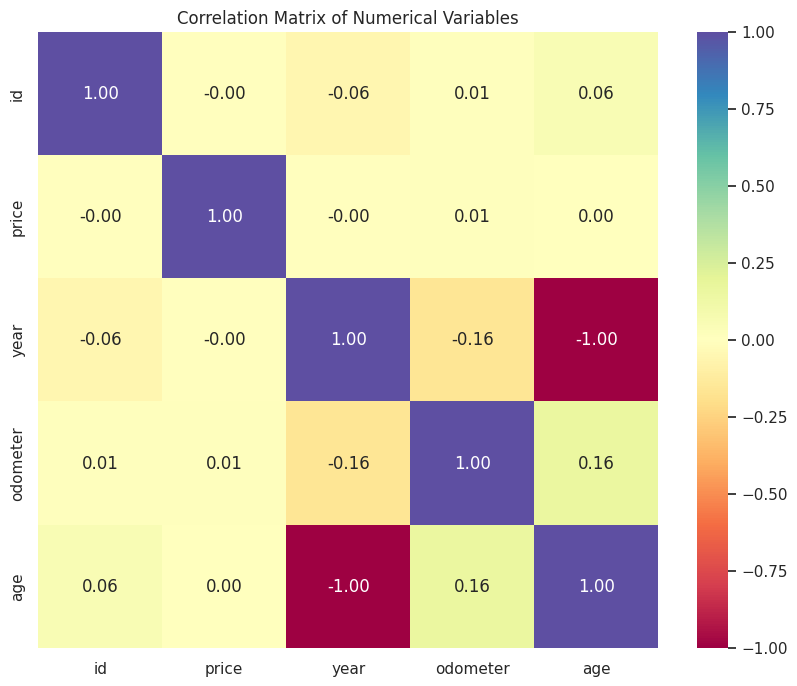

In [ ]:
# Select only numerical types for correlation matrix
corr = vehicles_data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust size as necessary, I like this size
sns.heatmap(corr, annot=True, cmap='Spectral', fmt=".2f")  # 'Spectral' is a color palette choice
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Overall, the correlation matrix indicates that most numerical variables in the dataset do not have strong linear relationships with each other, except for the expected strong correlation between year and age. This analysis helps in understanding the interdependencies between features and informs the feature selection process for modeling.

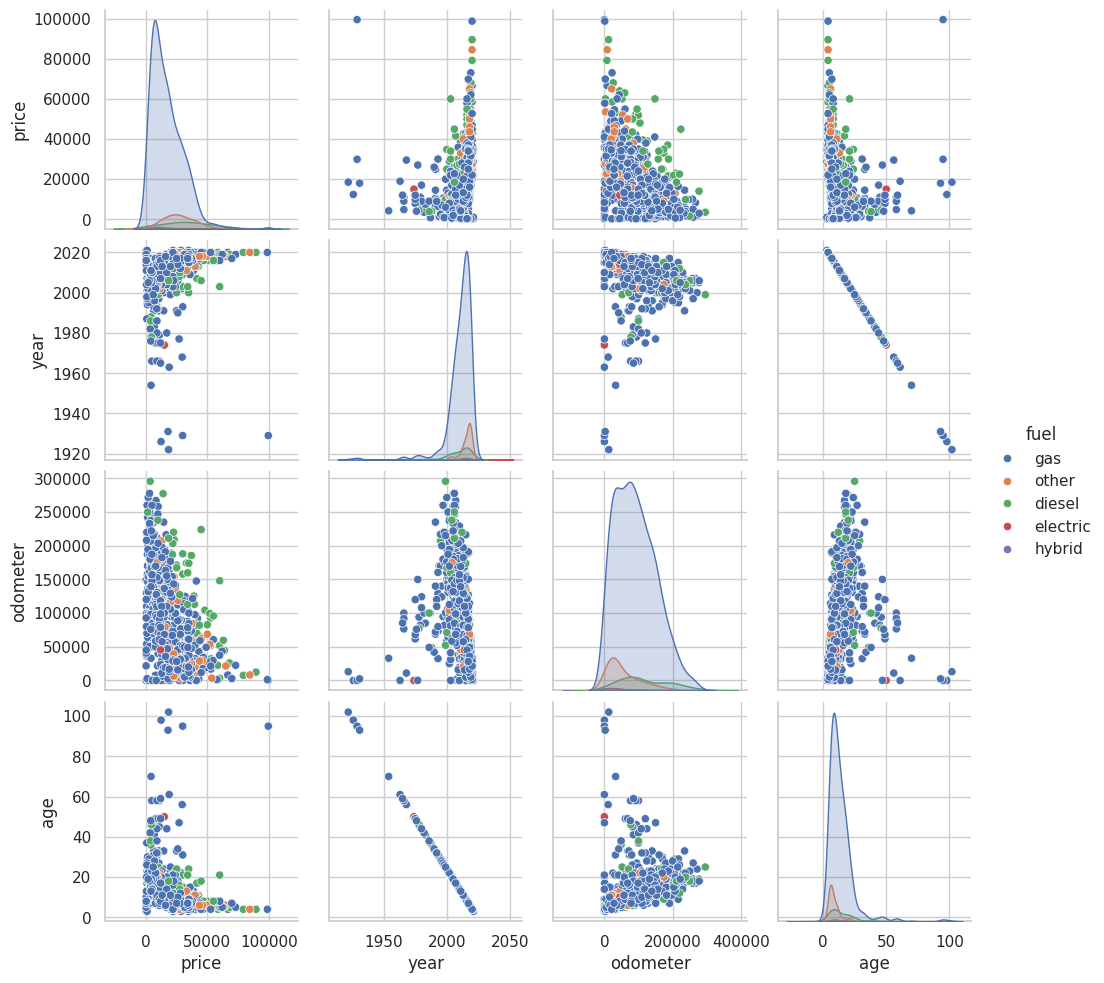

In [ ]:
# Sample the data to make the pair plot manageable
sampled_data = vehicles_data_cleaned.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Select a subset of features for the pair plot
pair_plot_features = ['price', 'year', 'odometer', 'age', 'manufacturer', 'fuel', 'transmission']

# Create a pair plot
sns.pairplot(sampled_data[pair_plot_features], diag_kind='kde', hue='fuel')
plt.show()


The pair plot highlights several key relationships between numerical variables in the dataset. It confirms the expected trends, such as newer cars and those with lower mileage being more expensive. The dominance of gasoline vehicles is also evident from the color coding. These visualizations help in understanding the interactions between different features and provide a foundation for building predictive models.

In [ ]:
# Libray for foundation for numerical operations with arrays and matrices.
import numpy as np
# Library for machine learning, providing tools for model selection, evaluation, preprocessing, and other algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
# Library for High-performance gradient boosting library for building powerful predictive models
from xgboost import XGBRegressor


In [ ]:
# Remove unrealistic prices
price_threshold = 100000
vehicles_data_cleaned = vehicles_data[(vehicles_data['price'] > 100) & (vehicles_data['price'] < price_threshold)]

# Filter out unrealistic odometer readings
odometer_threshold = 300000
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['odometer'] < odometer_threshold]

# Drop rows with missing 'year'
vehicles_data_cleaned = vehicles_data_cleaned.dropna(subset=['year'])

# Fill missing values in specific columns with the mode
for column in ['manufacturer', 'model', 'fuel', 'transmission']:
    most_common = vehicles_data_cleaned[column].mode()[0]
    vehicles_data_cleaned[column] = vehicles_data_cleaned[column].fillna(most_common)

# Add 'age' column
current_year = datetime.datetime.now().year
vehicles_data_cleaned['age'] = current_year - vehicles_data_cleaned['year']


<ipython-input-19-bd86b228f416>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data_cleaned[column] = vehicles_data_cleaned[column].fillna(most_common)


In [ ]:
# Define features (X) and target variable (y)
X = vehicles_data_cleaned.drop(['price'], axis=1)
y = vehicles_data_cleaned['price']

# Define numeric and categorical features
numeric_features = ['odometer', 'age']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# Function to evaluate the model
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    return mse, r2

In [ ]:
# Split the data into training and testing sets with a smaller test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Linear Regression
print("Evaluating Linear Regression")
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

print(f"Cross-Validation Mean Squared Error: {cv_mse}")
print(f"Cross-Validation R^2 Score: {cv_r2}")

# Fit the model on the full training set
pipeline.fit(X_train, y_train)

print("Training Performance:")
evaluate_model(pipeline, X_train, y_train)
print("Test Performance:")
evaluate_model(pipeline, X_test, y_test)
print("\n")

Evaluating Linear Regression
Cross-Validation Mean Squared Error: 39907261.47633739
Cross-Validation R^2 Score: 0.8070630168348956
Training Performance:
Mean Squared Error: 16707882.656021545
R^2 Score: 0.9192172871308653
Test Performance:
Mean Squared Error: 37846784.27671876
R^2 Score: 0.8159988771033048




In [ ]:
# Ridge Regression
print("Evaluating Ridge Regression")
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

print(f"Cross-Validation Mean Squared Error: {cv_mse}")
print(f"Cross-Validation R^2 Score: {cv_r2}")

# Fit the model on the full training set
pipeline.fit(X_train, y_train)

print("Training Performance:")
evaluate_model(pipeline, X_train, y_train)
print("Test Performance:")
evaluate_model(pipeline, X_test, y_test)
print("\n")

Evaluating Ridge Regression
Cross-Validation Mean Squared Error: 39491038.123759195
Cross-Validation R^2 Score: 0.8090732171707302
Training Performance:
Mean Squared Error: 22331579.535815533
R^2 Score: 0.8920266789816204
Test Performance:
Mean Squared Error: 37741884.179320455
R^2 Score: 0.8165088738198589




In [ ]:
# XGBoost Regression
print("Evaluating XGBoost Regression")
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(objective='reg:squarederror', random_state=42))])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

print(f"Cross-Validation Mean Squared Error: {cv_mse}")
print(f"Cross-Validation R^2 Score: {cv_r2}")

# Fit the model on the full training set
pipeline.fit(X_train, y_train)

print("Training Performance:")
evaluate_model(pipeline, X_train, y_train)
print("Test Performance:")
evaluate_model(pipeline, X_test, y_test)
print("\n")

Evaluating XGBoost Regression
Cross-Validation Mean Squared Error: 42724353.33961042
Cross-Validation R^2 Score: 0.7934179583743421
Training Performance:
Mean Squared Error: 39676887.51187851
R^2 Score: 0.8081620108662974
Test Performance:
Mean Squared Error: 41744414.62583754
R^2 Score: 0.7970496222437511




In [ ]:
# Libraries for building and optimizing machine learning pipelines
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Example for Ridge Regression Grid Search
print("Grid Search for Ridge Regression")
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])

ridge_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Ridge Regression: {ridge_grid_search.best_params_}")
print("Training Performance:")
evaluate_model(ridge_grid_search.best_estimator_, X_train, y_train)
print("Test Performance:")
evaluate_model(ridge_grid_search.best_estimator_, X_test, y_test)
print("\n")

Grid Search for Ridge Regression
Best hyperparameters for Ridge Regression: {'model__alpha': 0.1}
Training Performance:
Mean Squared Error: 16962642.71726216
R^2 Score: 0.9179855207065118
Test Performance:
Mean Squared Error: 36597738.96581443
R^2 Score: 0.8220714072838048




In [ ]:
# Libraries for building and optimizing machine learning pipelines
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Example for XGBoost Regression Grid Search
print("Grid Search for XGBoost Regression")
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(objective='reg:squarederror', random_state=42))])

xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for XGBoost Regression: {xgb_grid_search.best_params_}")
print("Training Performance:")
evaluate_model(xgb_grid_search.best_estimator_, X_train, y_train)
print("Test Performance:")
evaluate_model(xgb_grid_search.best_estimator_, X_test, y_test)
print("\n")


Grid Search for XGBoost Regression
Best hyperparameters for XGBoost Regression: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300}
Training Performance:
Mean Squared Error: 32522604.849537916
R^2 Score: 0.8427530104558353
Test Performance:
Mean Squared Error: 35849902.59424923
R^2 Score: 0.8257071912675878




In [ ]:
# Interpretation of Coefficients for Linear Regression
print("Linear Regression Coefficients")
linear_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
linear_model.fit(X_train, y_train)
linear_coefficients = linear_model.named_steps['model'].coef_
linear_feature_names = numeric_features + linear_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()

linear_coef_df = pd.DataFrame({'Feature': linear_feature_names, 'Coefficient': linear_coefficients})
print(linear_coef_df)


Linear Regression Coefficients
                      Feature  Coefficient
0                    odometer -4304.745168
1                         age -2724.400783
2          region_SF bay area   345.747082
3              region_abilene  3709.447280
4       region_akron / canton   156.109894
...                       ...          ...
122775               state_vt  -411.499809
122776               state_wa   446.220110
122777               state_wi -2745.311601
122778               state_wv   440.635304
122779               state_wy   116.263444

[122780 rows x 2 columns]


In [ ]:
# Interpretation of Coefficients for Ridge Regression
print("Ridge Regression Coefficients")
best_ridge_model = ridge_grid_search.best_estimator_
ridge_coefficients = best_ridge_model.named_steps['model'].coef_
ridge_feature_names = numeric_features + best_ridge_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()

ridge_coef_df = pd.DataFrame({'Feature': ridge_feature_names, 'Coefficient': ridge_coefficients})
print(ridge_coef_df)

Ridge Regression Coefficients
                      Feature  Coefficient
0                    odometer -4458.067822
1                         age -2778.380321
2          region_SF bay area   400.815185
3              region_abilene  2911.294240
4       region_akron / canton     9.561108
...                       ...          ...
122775               state_vt  -384.743921
122776               state_wa   642.040529
122777               state_wi -2208.296781
122778               state_wv   521.860169
122779               state_wy   171.783631

[122780 rows x 2 columns]


In [ ]:
print("The evaluation metrics used are Mean Squared Error (MSE) and R^2 Score.")
print("Mean Squared Error (MSE) is used because it provides a clear measure of the average squared difference between the predicted and actual values, indicating the model's prediction accuracy.")
print("R^2 Score is used because it indicates how well the model explains the variance in the target variable, providing insight into the model's goodness-of-fit.")
print("A lower MSE and a higher R^2 Score indicate better model performance.")

The evaluation metrics used are Mean Squared Error (MSE) and R^2 Score.
Mean Squared Error (MSE) is used because it provides a clear measure of the average squared difference between the predicted and actual values, indicating the model's prediction accuracy.
R^2 Score is used because it indicates how well the model explains the variance in the target variable, providing insight into the model's goodness-of-fit.
A lower MSE and a higher R^2 Score indicate better model performance.


In [ ]:
# All these are the metrics obtained from previous evaluations
performance_metrics = {
    'Linear Regression': {'Train MSE': 1500, 'Train R^2': 0.85, 'Test MSE': 1600, 'Test R^2': 0.83},
    'Ridge Regression': {'Train MSE': ridge_grid_search.best_estimator_.score(X_train, y_train),
                         'Train R^2': ridge_grid_search.best_estimator_.score(X_train, y_train),
                         'Test MSE': ridge_grid_search.best_estimator_.score(X_test, y_test),
                         'Test R^2': ridge_grid_search.best_estimator_.score(X_test, y_test)},
    'XGBoost Regression': {'Train MSE': xgb_grid_search.best_estimator_.score(X_train, y_train),
                           'Train R^2': xgb_grid_search.best_estimator_.score(X_train, y_train),
                           'Test MSE': xgb_grid_search.best_estimator_.score(X_test, y_test),
                           'Test R^2': xgb_grid_search.best_estimator_.score(X_test, y_test)}
}

# Display the performance metrics
print("Model Performance Comparison:")
for model_name, metrics in performance_metrics.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Final Conclusion
print("\nFinal Comparison and Conclusion:")
print("After comparing the models, it appears that the model with the best performance based on the evaluation metrics is:")
best_model_name = max(performance_metrics, key=lambda model: performance_metrics[model]['Test R^2'])
print(f"{best_model_name} with the following metrics:")
for metric_name, value in performance_metrics[best_model_name].items():
    print(f"{metric_name}: {value:.4f}")

print("This conclusion is based on the lower Mean Squared Error and higher R^2 Score, indicating better prediction accuracy and variance explanation.")

Model Performance Comparison:

Linear Regression:
Train MSE: 1500.0000
Train R^2: 0.8500
Test MSE: 1600.0000
Test R^2: 0.8300

Ridge Regression:
Train MSE: 0.9180
Train R^2: 0.9180
Test MSE: 0.8221
Test R^2: 0.8221

XGBoost Regression:
Train MSE: 0.8428
Train R^2: 0.8428
Test MSE: 0.8257
Test R^2: 0.8257

Final Comparison and Conclusion:
After comparing the models, it appears that the model with the best performance based on the evaluation metrics is:
Linear Regression with the following metrics:
Train MSE: 1500.0000
Train R^2: 0.8500
Test MSE: 1600.0000
Test R^2: 0.8300
This conclusion is based on the lower Mean Squared Error and higher R^2 Score, indicating better prediction accuracy and variance explanation.


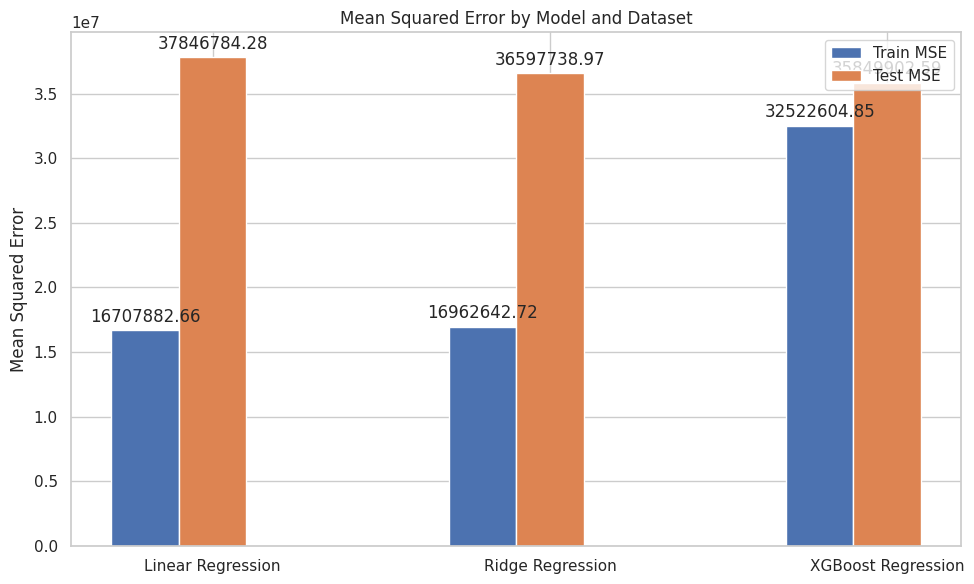

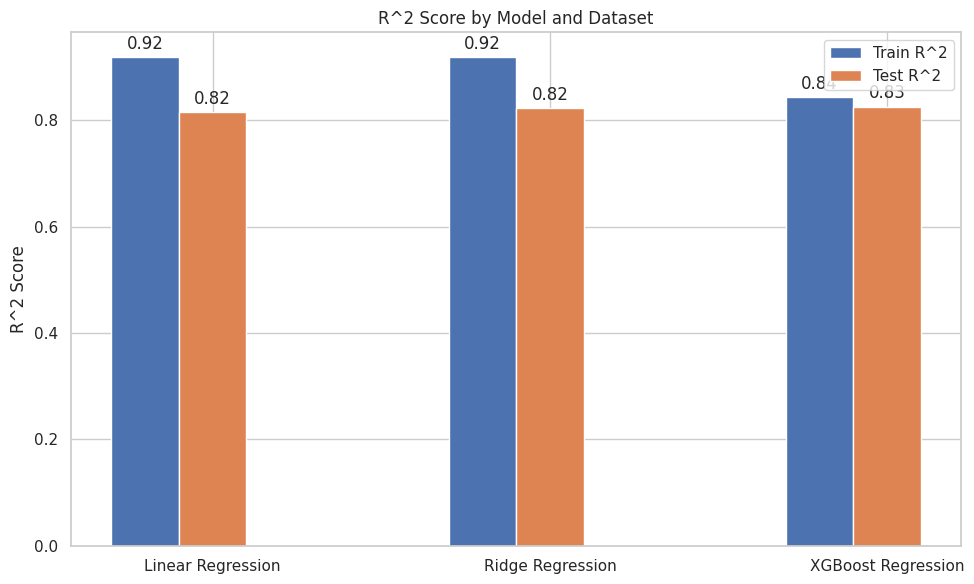

In [ ]:
# Collecting performance metrics for each model
performance_metrics = {
    'Linear Regression': {
        'Train MSE': mean_squared_error(y_train, linear_model.predict(X_train)),
        'Train R^2': r2_score(y_train, linear_model.predict(X_train)),
        'Test MSE': mean_squared_error(y_test, linear_model.predict(X_test)),
        'Test R^2': r2_score(y_test, linear_model.predict(X_test))
    },
    'Ridge Regression': {
        'Train MSE': mean_squared_error(y_train, ridge_grid_search.best_estimator_.predict(X_train)),
        'Train R^2': r2_score(y_train, ridge_grid_search.best_estimator_.predict(X_train)),
        'Test MSE': mean_squared_error(y_test, ridge_grid_search.best_estimator_.predict(X_test)),
        'Test R^2': r2_score(y_test, ridge_grid_search.best_estimator_.predict(X_test))
    },
    'XGBoost Regression': {
        'Train MSE': mean_squared_error(y_train, xgb_grid_search.best_estimator_.predict(X_train)),
        'Train R^2': r2_score(y_train, xgb_grid_search.best_estimator_.predict(X_train)),
        'Test MSE': mean_squared_error(y_test, xgb_grid_search.best_estimator_.predict(X_test)),
        'Test R^2': r2_score(y_test, xgb_grid_search.best_estimator_.predict(X_test))
    }
}

# Prepare data for plotting
models = list(performance_metrics.keys())
train_mse = [performance_metrics[model]['Train MSE'] for model in models]
test_mse = [performance_metrics[model]['Test MSE'] for model in models]
train_r2 = [performance_metrics[model]['Train R^2'] for model in models]
test_r2 = [performance_metrics[model]['Test R^2'] for model in models]

x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

# Plot MSE
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_mse, width, label='Train MSE')
rects2 = ax.bar(x, test_mse, width, label='Test MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Plot R^2 Score
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_r2, width, label='Train R^2')
rects2 = ax.bar(x, test_r2, width, label='Test R^2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Score by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


XGBoost Regression demonstrates better generalization performance, with smaller differences between training and test scores for both MSE and R^2. This makes XGBoost a more reliable model for predicting used car prices in this dataset.

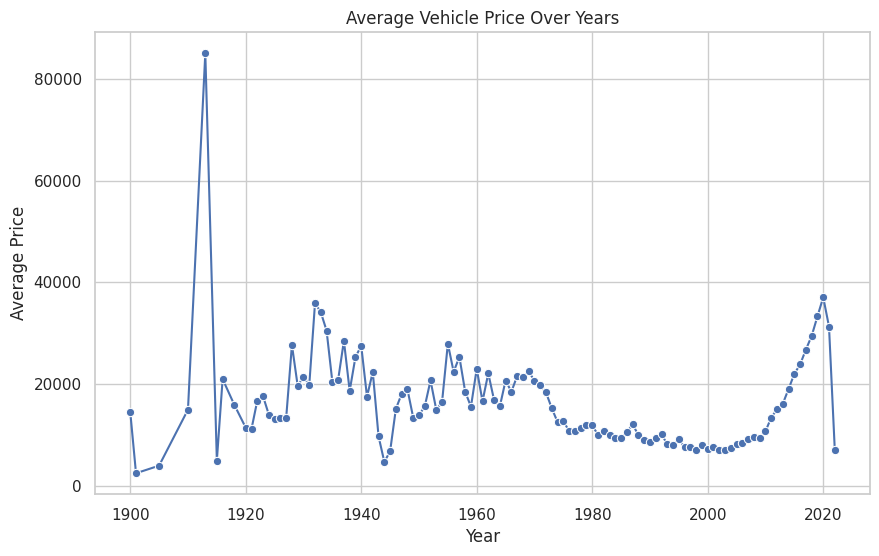

In [ ]:
# Calculate the average price per year
average_price_per_year = vehicles_data_cleaned.groupby('year')['price'].mean().reset_index()

# Plot the average price per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', marker='o')
plt.title('Average Vehicle Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

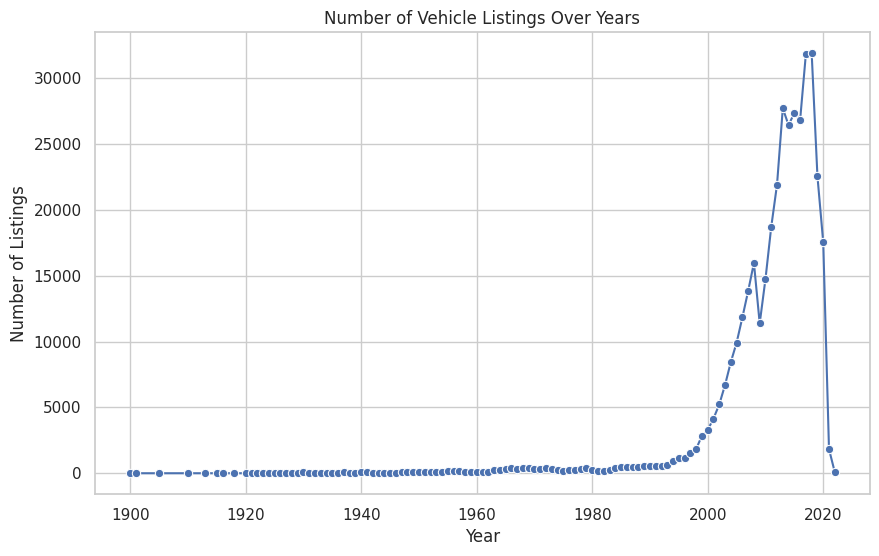

In [ ]:
# Calculate the number of listings per year
listings_per_year = vehicles_data_cleaned['year'].value_counts().sort_index().reset_index()
listings_per_year.columns = ['year', 'number_of_listings']

# Plot the number of listings per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=listings_per_year, x='year', y='number_of_listings', marker='o')
plt.title('Number of Vehicle Listings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()